# User Knowledge Modeling Data Set
**Introduction:** <br> 
>This database, created by the University of California, aims to study and measure the knowledge level of students regarding Electrical DC Machines. In order to predict the root of the student's knowledge levels, they collected data from 5 predictors: 
 <br> 
- STG - The degree of study time for goal object material
- SCG - The degree of repetition number of user for goal object material
- STR - The degree of study time of user for related objects with goal object
- LPR - The exam performance of user for related objects with goal object
- PEG - The exam performance of user for goal object
- Class(UGC) - The knowledge level of user
 <br> 
 <br> 
By comparing these variables we are aiming to answer the following question: <br> 

>*How does the relationship between the exam performance levels of the goal object and related goal objects affect the user's Electrical DC Machines knowledge level?* <br>

In order to answer the proposed question for our project we used the dataset `Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls` . Our project goal is to predict the degree of knowledge students have of electrical DC machines defined by the variable “class”. The degree of knowledge can be predicted using the LPR and PEG variables. <br>

The different possible classes to rank a student's level of knowledge are the following:
- Very Low
- Low
- Middle
- High




In [2]:
# We started by loading the necessary library for our project
library(tidyverse)
library(repr)
library(tidymodels)
library(readxl)
options(repr.matrix.max.rows = 6)

**Preliminary exploratory data analysis:**  <br>
<br>
Our dataset can be found in the machine learning database. Rather than loading the dataset from a local environment, we directly imported it from the web. 
Since our data is already split into training and test data, we specify that we will be using *training* data. Our data contains extra columns so we will be specifying which ones we would like to use. 


In [3]:
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00257/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls"

download.file(url, destfile = "Knowledge.xls")

# Selecting the training data from sheet 2
knowledge_df <- read_excel(path = "Knowledge.xls", sheet = 2)

#renaming the variable "very_low" to "Very Low" in order to facilitate data analysis with test data later on
knowledge_df$UNS <- recode(knowledge_df$UNS,
                                      "very_low" = "Very Low")
knowledge_df

New names:
• `` -> `...7`
• `` -> `...8`


STG,SCG,STR,LPR,PEG,UNS,...7,...8,Attribute Information:
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<chr>
0.00,0.00,0.00,0.00,0.00,Very Low,NA,NA,"STG (The degree of study time for goal object materails),"
0.08,0.08,0.10,0.24,0.90,High,NA,NA,SCG (The degree of repetition number of user for goal object materails)
0.06,0.06,0.05,0.25,0.33,Low,NA,NA,STR (The degree of study time of user for related objects with goal object)
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0.54,0.82,0.71,0.29,0.77,High,NA,NA,NA
0.50,0.75,0.81,0.61,0.26,Middle,NA,NA,NA
0.66,0.90,0.76,0.87,0.74,High,NA,NA,NA


In [4]:
# Selecting and factoring the necessary columns for our data analysis
knowledge <- mutate(knowledge_df, class=UNS) |>
         select(STG, SCG,STR,LPR,PEG,class) 
knowledge

STG,SCG,STR,LPR,PEG,class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.00,0.00,0.00,0.00,Very Low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
⋮,⋮,⋮,⋮,⋮,⋮
0.54,0.82,0.71,0.29,0.77,High
0.50,0.75,0.81,0.61,0.26,Middle
0.66,0.90,0.76,0.87,0.74,High


**Methods** <br>
<br>
Next, we used `mutate` and `as_factor` to convert the variable `class` into a factor. 
Using `group_by` and `summarize` we will find the distribution of data by counting the number of each `class` variable. The `mutate`  term is also used to determine the percentage distribution. 


In [6]:
knowledge <- knowledge[order(knowledge$class),] |> mutate(class = as.factor(class))
knowledge

STG,SCG,STR,LPR,PEG,class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.08,0.08,0.10,0.24,0.90,High
0.00,0.00,0.50,0.20,0.85,High
0.18,0.18,0.55,0.30,0.81,High
⋮,⋮,⋮,⋮,⋮,⋮
0.59,0.18,0.31,0.55,0.09,Very Low
0.60,0.19,0.55,0.08,0.10,Very Low
0.55,0.17,0.71,0.48,0.11,Very Low


In [11]:
knowledge_proportions <- knowledge |>
                      group_by(class) |>
                      summarize(count = n()) |>
                      mutate(percent = 100*count/nrow(knowledge))
knowledge_proportions

class,count,percent
<fct>,<int>,<dbl>
High,63,24.418605
Low,83,32.170543
Middle,88,34.108527
Very Low,24,9.302326


Next, the results will be visualised using *scatter plots*. 

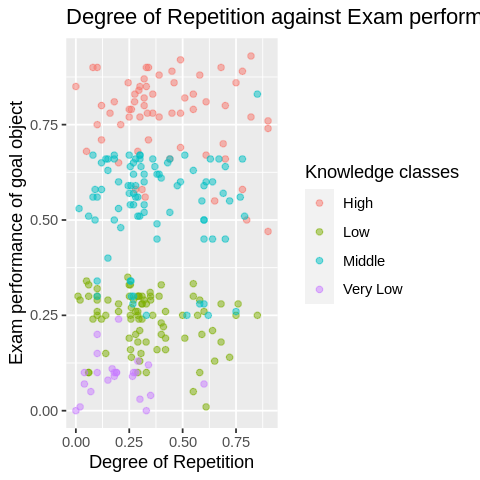

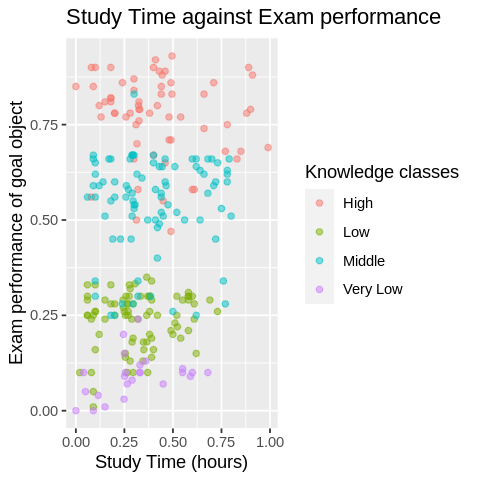

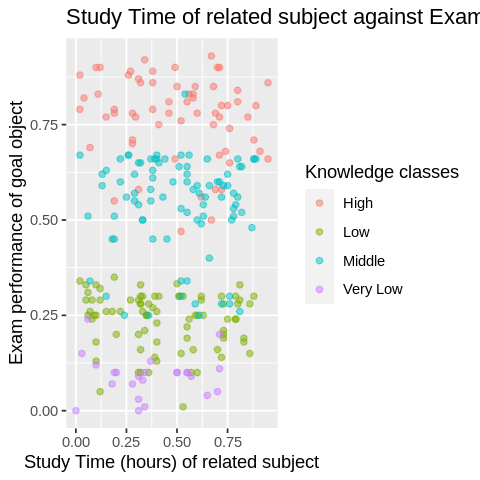

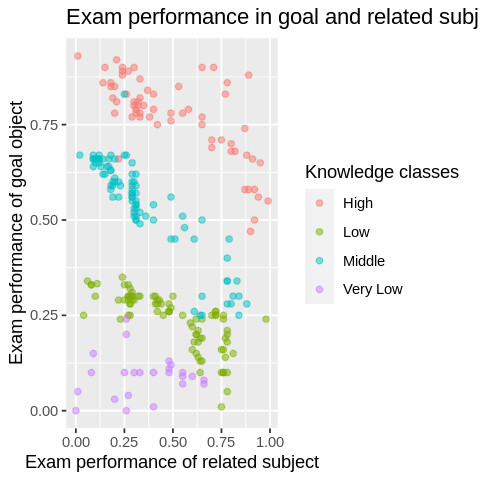

In [12]:
#visualizing initial plot to see which variable has highest influence
options(repr.plot.width = 4, repr.plot.height = 4)
par(mfrow = c(1, 2))
SCG_PEG_plot <- ggplot(knowledge, aes(x= SCG, y= PEG, colour = class)) + 
                      geom_point(alpha = 0.5) +
                        ggtitle("Degree of Repetition against Exam performance of goal object") +
                      labs(x="Degree of Repetition", y="Exam performance of goal object", color = "Knowledge classes")
SCG_PEG_plot

STG_PEG_plot <- ggplot(knowledge, aes(x= STG, y= PEG, colour = class)) + 
                      geom_point(alpha = 0.5) +
                        ggtitle("Study Time against Exam performance") +
                      labs(x="Study Time (hours)", y="Exam performance of goal object", color = "Knowledge classes")
STG_PEG_plot

STR_PEG_plot <- ggplot(knowledge, aes(x= STR, y= PEG, colour = class)) + 
                      geom_point(alpha = 0.5) +
                        ggtitle("Study Time of related subject against Exam performance") +
                      labs(x="Study Time (hours) of related subject", y="Exam performance of goal object", color = "Knowledge classes")
STR_PEG_plot

STR_PEG_plot <- ggplot(knowledge, aes(x= LPR, y= PEG, colour = class)) + 
                      geom_point(alpha = 0.5) +
                    ggtitle("Exam performance in goal and related subject") +
                      labs(x="Exam performance of related subject", y="Exam performance of goal object", color = "Knowledge classes")
STR_PEG_plot

**Expected outcomes and significance:**
<br>
<br>

When comparing all the provided variables, we expected that the gained knowledge would be directly related to the amount of time spent studying the goal object and its exam performance. However, after plotting these variables, we found that there was no correlation between PEG, STG and the user's knowledge. Alternatively, we observed that there is a significant positive relationship between LPR, PEG and the user's knowledge. <br>
<br>
We do not believe that the finding of this dataset will be very impactful. The relationship between knowledge and exam performance is not an accurate representation of knowledge retention. Factors such as test anxiety negatively impact a person's ability to score well on tests despite having a high degree of knowledge. Additionally, we believe that the amount of time a person studies any given material should have a significant impact on their knowledge. Considering these factors, we may ask ourselves *are there better means of collecting this data or are there other more impactful factors that aren't being considered in this study?*
